# Compare Gradient Descent Method with Newton Method

Implementation details: For either methods, and any step size, start in iteration t = 1 at the same point x1 = (0, 0), for fairer comparison.

Here we can calculate 2/β = 0.195, i.e., in terms of the smoothness constant β of F (via its Hessian). According to theory, we should set the step size η for Gradient Descent to η < 2/β. In the case of Newton, which uses a better approximation, we can use a larger step size.

Therefore, on the same figure, plot F(xt) against t ∈ [1, 2, . . . , 30] for the following 4 configurations, and label each curve appropriately as given below 
(NM1 through GD0.2)

In [6]:
import numpy as np
import math

In [7]:
Sigma = np.array ([[5 , 0],[0 , 0.5]])
II = np.array ([[1 , 1]])

def func0 ( x ):
    return np.dot( np.dot( x.transpose() , Sigma ) , x )+ math.log ( 1+ math.exp(-np.dot( II , x ) ) )

def First_derivative ( x ):
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-( x1+x2 ) )
    return np.array ([[10*x1-ex/( 1+ex )],[x2-ex/( 1+ex )]])

def Second_derivative ( x ):
    x1 = x[0][0]
    x2 = x[1][0]
    ex = math.exp(-( x1+x2 ) )
    ex = ex/( 1+ex ) ** 2
    return np . array ([[10+ex , ex],[ex , 1+ex]])

def gradient(X0,stepsize,iter):
    temp=[[],[]]
    X=X0
    Y=func0(X)
    for i in range(0,iter):
        temp[0]=X[0]-np.dot(stepsize,First_derivative(X))[0]
        temp[1]=X[1]-np.dot(stepsize,First_derivative(X))[1]
        X= np.array([temp[0],temp[1]])
        Y= func0(X)
    return X,Y

def Newton(X0,stepsize,iter):
    temp=[[],[]]
    X=X0
    Y=func0(X)
    for i in range(0,iter):
        X= X-stepsize*np.dot(np.linalg.inv(Second_derivative(X)),First_derivative(X))
        Y= func0(X)
    return X,Y

(NM1) Newton Method with constant step size η = 1

In [8]:
x0=np.array([[0],[0]])
temp=[]
for i in range(0,30):
    temp = np.append(temp,Newton(x0,stepsize=1,iter=i))
X_1=[arr for i, arr in enumerate(temp) if i % 2 == 0]
Y_1=[arr for i, arr in enumerate(temp) if i % 2 != 0]
Y_1=[arr[0][0] for arr in Y_1]

(GD0.1) Gradient Descent Method with constant step size η = 0.1

In [9]:
x0=np.array([[0],[0]])
temp=[]
for i in range(0, 30):
    temp = np.append(temp,gradient(x0,stepsize=0.1,iter=i))
X_01=[arr for i, arr in enumerate(temp) if i % 2 == 0]
Y_01=[arr for i, arr in enumerate(temp) if i % 2 != 0]
Y_01=[arr[0][0] for arr in Y_01]

(GD0.19) Gradient Descent Method with constant step size η = 0.19

In [10]:
temp=[]
for i in range(0, 30):
    temp = np.append(temp,gradient(x0,stepsize=0.19,iter=i))
X_019=[arr for i, arr in enumerate(temp) if i % 2 == 0]
Y_019=[arr for i, arr in enumerate(temp) if i % 2 != 0]
Y_019=[arr[0][0] for arr in Y_019]

(GD0.2) Gradient Descent Method with constant step size η = 0.2

In [11]:
temp=[]
for i in range(0, 30):
    temp = np.append(temp,gradient(x0,stepsize=0.2,iter=i))
X_02=[arr for i, arr in enumerate(temp) if i % 2 == 0]
Y_02=[arr for i, arr in enumerate(temp) if i % 2 != 0]
Y_02=[arr[0][0] for arr in Y_02]

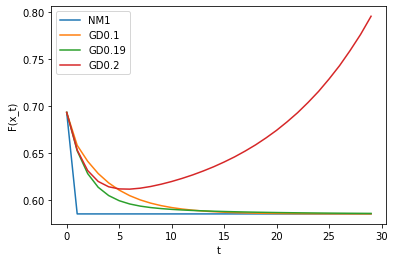

In [12]:
import matplotlib.pyplot as plt
t=range(30)

plt.plot(t,Y_1,label='NM1')
plt.plot(t,Y_01,label='GD0.1')
plt.plot(t,Y_019,label='GD0.19')
plt.plot(t,Y_02,label='GD0.2')

plt.xlabel('t')
plt.ylabel('F(x_t)')
plt.legend()

Problem 5: Regular SGD vs Adagrad optimization on a Regression problem

(b) Implement the above two procedures in Python, using β = 2(σ^2 +λ) (smoothness measure)

In [13]:
## Code for generator / sampler
import numpy as np
import random
import time
from numpy import linalg as LA
import statistics

# initialization
sigma = 1
d = 10
c_square = 100
cov = np.diag ([( 0.25 ** i )* c_square for i in range (1 , d+1 )])
mean = [0]*d
# coeficient given
w = np.array ([1]*d )

# Sampler function
def sampler ( n ):
    # data X generator
    np.random.seed ( int( time.time ()* 100000 )% 100000 )
    X = np.random.multivariate_normal (mean,cov,n)
    # data Y generator
    Y = np . matmul (X,w)+np.random.normal (0 , sigma ** 2 , n )
    return X, Y

def gradient(x,y,w,n):
    return ((w.T.dot(x)-y)*x*2+0.2*w)

In [14]:
def regularSGD (X,Y,d=10,w = np.array ([0]*d)):
    w_star = np.array ([1]*d )
    n= len(X)
    w = np.array ([0]*d)
    sigma=(2**(-1))*10
    beta=2*(sigma+0.1)
    t=0
    diff=[]
    diff_r=[]
    
    while t < n:
        F_derivative = 2*(Y[t]-np.dot(np.dot(w,X[t]),(-(X[t]))))+2*0.1*w/n
        sigma += np.linalg.norm(F_derivative)
        stepsize = np.sqrt(1/np.dot(beta,sigma))
        w=w-np.dot(stepsize,F_derivative)
        t=t+1
        diff=np.sqrt(np.sum((w-w_star)**2))
        diff_r=np.append(diff_r,diff)
        
    return diff_r

In [15]:
def Adagrad (x,y,d=10,w = np.array ([0]*d)):
    w_star = np.array ([1]*d )
    n=len(x)
    sigma=(2**(-1))*10
    beta=2*(sigma+0.1)
    t=0
    F=[]
    diff=[]
    
    for t in range(n):
        Ft=gradient(x[t],y[t],w,n)
        F.append(Ft**2)
        ita=np.diag(1/np.sqrt(np.sum(F,axis=0)*beta))
        w=w-ita.dot(Ft)
        diff.append(np.sqrt(np.sum((w-w_star)**2)))
    return diff
    

In [16]:
SGD=[]
for i in range(10):
    data_ran=sampler(1000)
    X=data_ran[0]
    Y=data_ran[0]
    SGD.append(regularSGD(X=X,Y=Y))

SGD_var=np.var(SGD,axis=0)
SGD_mean=np.mean(SGD,axis=0)

In [20]:
AGD=[]
for i in range(10):
    data_ran=sampler(1000)
    X=data_ran[0]
    Y=data_ran[1]
    AGD.append(Adagrad(x=X,y=Y))

AGD_var=np.var(AGD,axis=0)
AGD_mean=np.mean(AGD,axis=0)

array([[ 6.93801931e+00,  2.54691792e+00,  1.35991364e+00, ...,
        -8.65635197e-02,  1.67390348e-02, -4.69229001e-03],
       [ 6.03870611e+00, -2.38388194e-02,  2.12057640e+00, ...,
        -9.44893297e-02,  2.19524579e-02, -1.50668470e-02],
       [-1.02450611e+01, -5.06645157e-01, -1.30253812e+00, ...,
         4.38404031e-02,  1.37417773e-02,  8.25831486e-03],
       ...,
       [-3.06970546e+00, -2.14652477e+00,  1.46301647e-01, ...,
         3.00632465e-02,  2.63225255e-02,  6.35963955e-03],
       [-1.19154336e+00,  1.14024739e+00, -2.71064138e+00, ...,
        -5.41792649e-02,  2.81213751e-02, -9.22048740e-03],
       [-1.72881793e+00, -1.79218932e+00,  5.92130250e-01, ...,
        -3.95298337e-02,  2.64451606e-03,  2.84413483e-03]])

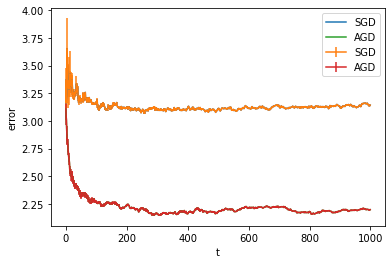

In [48]:
import matplotlib.pyplot as plt
t=range(1000)

#plt.plot(t,SGD_mean,label='SGD')
plt.errorbar(t,SGD_mean,yerr=SGD_var,label='SGD')
plt.plot(t,AGD_mean,label='AGD')
plt.errorbar(t,AGD_mean,yerr=AGD_var,label='AGD')
plt.xlabel('t')
plt.ylabel('error')
plt.legend()
plt.show()

The AGD is faster converging, lower error and less variated.